# 决策树实践——学生活跃度











引入包

In [1]:
# !/usr/bin/python
# -*- coding:utf-8 -*-
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder




设置绘图参数

In [2]:

mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False


读入样例数据

In [3]:
path = r'.\data\student.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
# 记录学生“关注活动”和“活动表现”两个特征数据
x = data[list(range(2))]
# 记录学生是否活跃的分类信息
y = LabelEncoder().fit_transform(data[2])

构建决策树模型

决策树分裂过程结果描述了生成树的过程，共进行了3层树的分裂过程，其树形图的样式如图所示  


![树状](./img/pic1.png)


但当划分层次过多时，树形表示并不方便醒目，可应用分类树的二维图形进行描述，将上图表示成二维图

![二维图](./img/pic2.png)


In [4]:

# 建立决策树模型
model = DecisionTreeClassifier(criterion='entropy',max_depth=2)
#model = DecisionTreeClassifier(max_depth=3)
model.fit(x, y)
y_test_hat = model.predict(x)      # 测试数据
print('预测值与真实值的准确率:', accuracy_score(y, y_test_hat))


预测值与真实值的准确率: 0.9285714285714286


决策树的可视化

<ipython-input-5-d7e8790a80dc>:26: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(data2[0:, :1], data2[0:, 1:2], marker='o', color='', edgecolors='g', label='2', s=70)


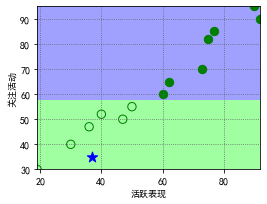

In [5]:
student_feature = '活跃表现', '关注活动'
# 画图
N, M = 50, 50  # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # 预测值
#print(y_show_hat.shape)
#print(y_show_hat)
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
#print(y_show_hat)
plt.figure(figsize=(4, 3),facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示

data1 = array([[60, 60], [62, 65], [73, 70], [75, 82], [77, 85], [90, 95], [92, 90]])  # 活跃和学生
data2 = array([[19, 30], [30, 40], [36, 47], [40, 52], [47, 50], [50, 55]])  # 不活跃的学生
testdata = [37, 35]

plt.scatter(data1[0:, :1], data1[0:, 1:2], marker='o', color='g', label='1', s=70)
plt.scatter(data2[0:, :1], data2[0:, 1:2], marker='o', color='', edgecolors='g', label='2', s=70)
plt.scatter(testdata[:1], testdata[1:], marker='*', color='b', label='3', s=120)

plt.xlabel(student_feature[0], fontsize=9)
plt.ylabel(student_feature[1], fontsize=9)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(b=True, ls=':', color='#606060')
plt.show()



评估模型的性能指标

可以看到★的学生，他本来是活跃的学生，相对于大多数的活跃学生●属于离群信息，故在进行2层深度数据的决策时，找到大多数数据的信息表示，把他分到了不活跃学生的行列，即第7个数据分类错误，此时模型的正确率是92.86%。!

In [6]:


# 训练集上的预测结果
y_test = y.reshape(-1)
print(y_test_hat)
print(y_test)
result = (y_test_hat == y_test)  # True则预测正确，False则预测错误
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))

[0 0 0 0 0 0 0 1 1 1 1 1 1 1]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
准确度: 92.86%
